<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L05-Analyzing%20Sentence%20Structure/Note_3_Parsing_Techniques_and_Dependency_Grammar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4. Parsing with Context-Free Grammar**



### **4.1 Recursive Descent Parsing**



#### **Explanation of Recursive Descent Parsing**
  - A top-down parsing technique that breaks down a sentence into its components by recursively applying grammar rules.
  - Starts from the root of the parse tree (e.g., the sentence as a whole) and works down to the leaves (the individual words or tokens).
  - It follows the structure defined by the grammar rules, attempting to match the input to these rules.
  - **Example**: If the grammar contains the rule `S -> NP VP`, the parser begins by attempting to identify components that fit as a `NP` (noun phrase) and a `VP` (verb phrase) in the sentence.
  - Recursive descent parsers are easy to implement and understand but may not always be efficient for large or complex sentences.

  - **Code Demonstration**:


In [3]:
import nltk
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N
VP -> V NP
Det -> 'the'
N -> 'cat' | 'dog'
V -> 'chased' | 'saw'
""")
rd_parser = nltk.RecursiveDescentParser(grammar)
sent = "the cat chased the dog".split()
for tree in rd_parser.parse(sent):
    print(tree)


(S (NP (Det the) (N cat)) (VP (V chased) (NP (Det the) (N dog))))


In [6]:
for tree in rd_parser.parse(sent):
  tree.pretty_print()

              S               
      ________|_____           
     |              VP        
     |         _____|___       
     NP       |         NP    
  ___|___     |      ___|___   
Det      N    V    Det      N 
 |       |    |     |       |  
the     cat chased the     dog



In [7]:
!pip install svgling
from IPython.display import display
import svgling

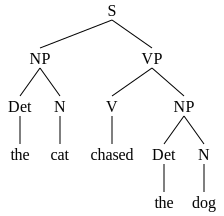

In [8]:
for tree in rd_parser.parse(sent):
    display(svgling.draw_tree(tree))


#### **Limitations of Recursive Descent Parsing**
  - **Left-Recursive Rules**: Recursive descent parsers struggle with left-recursive grammar rules (e.g., `S -> S VP`) because they can lead to infinite loops. This happens because the rule keeps expanding without making progress in consuming the input.
  - **Backtracking**: The parser may need to backtrack frequently when it reaches dead ends. This is inefficient and can lead to parsing paths being attempted multiple times unnecessarily.
  - **Inefficiency**: It may attempt several unsuccessful parses before finding the correct one, which can be computationally expensive, especially for ambiguous sentences.


From the Book:

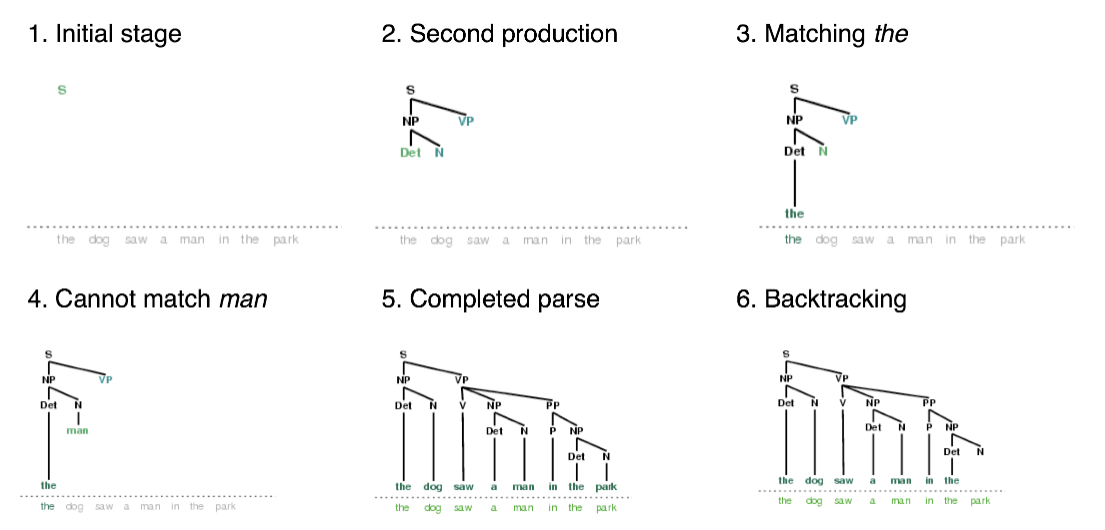


### **4.2 Shift-Reduce Parsing**



#### **Explanation of Shift and Reduce Operations**
  - **Shift**: The parser moves the next word from the input buffer onto a stack. This operation essentially means progressing to the next word in the sentence.
  - **Reduce**: The parser applies a grammar rule to combine elements currently on the stack into higher-level components (like phrases). For example, if the stack has a `Det` (determiner) followed by an `N` (noun), a reduce operation could combine them into an `NP` (noun phrase).
  - The parsing process involves alternating between shifting new words onto the stack and reducing items on the stack to form larger phrases.


#### **Code Demonstration**:


In [11]:

from nltk.parse import ShiftReduceParser
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N
VP -> V NP
Det -> 'the'
N -> 'dog' | 'cat'
V -> 'chased'
""")
sr_parser = ShiftReduceParser(grammar)
sent = "the dog chased the cat".split()
for tree in sr_parser.parse(sent):
    print(tree)


(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))


In [12]:
for tree in sr_parser.parse(sent):
  tree.pretty_print()

              S               
      ________|_____           
     |              VP        
     |         _____|___       
     NP       |         NP    
  ___|___     |      ___|___   
Det      N    V    Det      N 
 |       |    |     |       |  
the     dog chased the     cat




#### **Advantages and Disadvantages of Shift-Reduce Parsing**
  - **Advantages**:
    - Efficient for parsing shorter and simpler sentences.
    - Does not require the complexity of backtracking, as decisions are made incrementally.
  - **Disadvantages**:
    - **Dead-End Situations**: The parser may apply incorrect reductions, leading to states where parsing cannot continue. This is especially problematic for ambiguous grammars.
    - **Incomplete Parsing**: It is not guaranteed to always find a correct parse, even when one exists, due to early incorrect reduction decisions.


From the Book:

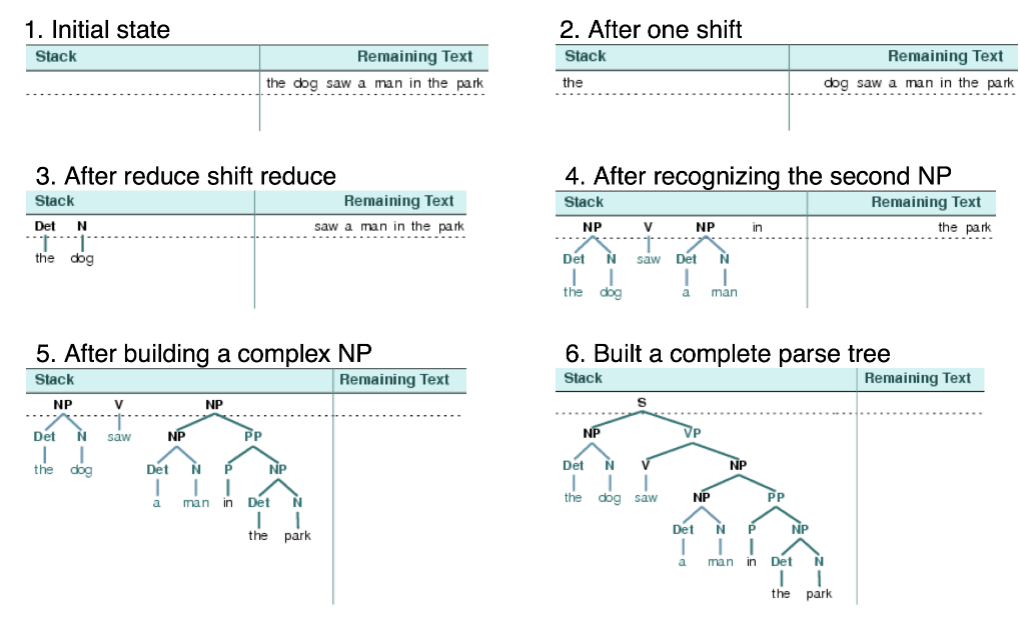


### **4.3 The Left-Corner Parser**



#### **Combining Top-Down and Bottom-Up Parsing**
  - The left-corner parser is a hybrid approach that aims to improve the efficiency of parsing by combining both top-down and bottom-up strategies.
  - It begins by identifying smaller structures (using a bottom-up approach) and then proceeds to larger, more abstract parts of the sentence (using a top-down approach).
  - This combination allows the parser to predict upcoming parts of the sentence more efficiently, using context derived from previous analysis.



#### **Handling Left-Recursive Productions**
  - Left-corner parsing is particularly useful for handling left-recursive grammar rules that cause issues in traditional recursive descent parsing.
  - By starting with smaller components and building upwards, the left-corner parser avoids infinite loops and efficiently recognizes left-recursive patterns.
  - **Example**: A left-corner parser can effectively parse sentences involving multiple nested clauses, which are challenging for purely top-down approaches.



### **4.4 Well-Formed Substring Tables**



#### **Dynamic Programming Approach to Parsing**
  - Well-Formed Substring Tables (WFST) are used as part of a dynamic programming approach to improve parsing efficiency.
  - The idea is to break a sentence into substrings and record intermediate parsing results in a table, which can be reused as parsing proceeds.



#### **Use of Well-Formed Substring Tables (WFST)**
  - **Table Structure**: The WFST is a table that tracks which parts of the input have been successfully parsed and what non-terminals they correspond to.
  - **Efficient Parsing**: By storing results in the table, the parser avoids re-parsing the same substring multiple times, which speeds up parsing considerably.


#### **Code Demonstration**:


In [18]:
# Initialize the WFST (Well-Formed Substring Table) based on the tokens and grammar.
def init_wfst(tokens, grammar):
    # Get the number of tokens in the input sentence.
    numtokens = len(tokens)

    # Create a 2D table (WFST) with None values.
    # It has dimensions (numtokens+1) x (numtokens+1) to represent substrings.
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]

    # Loop through each token in the sentence.
    for i in range(numtokens):
        # Get the productions (grammar rules) where the right-hand side (rhs) matches the current token.
        productions = grammar.productions(rhs=tokens[i])

        # If there are matching productions, place the left-hand side (lhs) of the production rule in the WFST.
        # This populates the diagonal of the WFST table with non-terminals like Det, N, V, etc.
        if productions:
            wfst[i][i+1] = productions[0].lhs()  # Use the lhs (left-hand side) of the first matching production.

    # Return the initialized WFST.
    return wfst


In [19]:
# Display the WFST in a formatted manner.
def display(wfst, tokens):
    # Print the column headers (numbers) for the WFST matrix.
    print('\nWFST ' + ' '.join(('%-4d' % i) for i in range(1, len(wfst))))

    # Loop through each row of the WFST matrix to print its contents.
    for i in range(len(wfst)-1):
        # Print the row number on the left.
        print('%d   ' % i, end=' ')

        # Loop through each column, printing either the non-terminal symbol or a dot ('.') if it's None.
        for j in range(1, len(wfst)):
            print('%-4s' % (wfst[i][j] or '.'), end=' ')

        # Move to the next line after printing each row.
        print()


In [22]:
!pip install nltk
import nltk


In [23]:

# Tokenize the sentence into individual words.
tokens = "the cat chased the dog".split()

# Define a simple context-free grammar (CFG) with rules for sentences, noun phrases, verb phrases, etc.
# Removed inline comments from the grammar string
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N
VP -> V NP
Det -> 'the'
N -> 'cat' | 'dog'
V -> 'chased'
""")

# Initialize the WFST using the tokens and grammar.
wfst0 = init_wfst(tokens, grammar)

# Display the WFST to visualize how the sentence is parsed based on the grammar.
display(wfst0, tokens)


WFST 1    2    3    4    5   
0    Det  .    .    .    .    
1    .    N    .    .    .    
2    .    .    V    .    .    
3    .    .    .    Det  .    
4    .    .    .    .    N    


#### **Example**:

Suppose a phrase like "in the garden" is parsed as a prepositional phrase (`PP`). Instead of re-parsing this phrase every time it occurs in different sentences, the WFST stores it and allows the parser to directly use the precomputed result.



### **4.5 Comparion of Parsers**

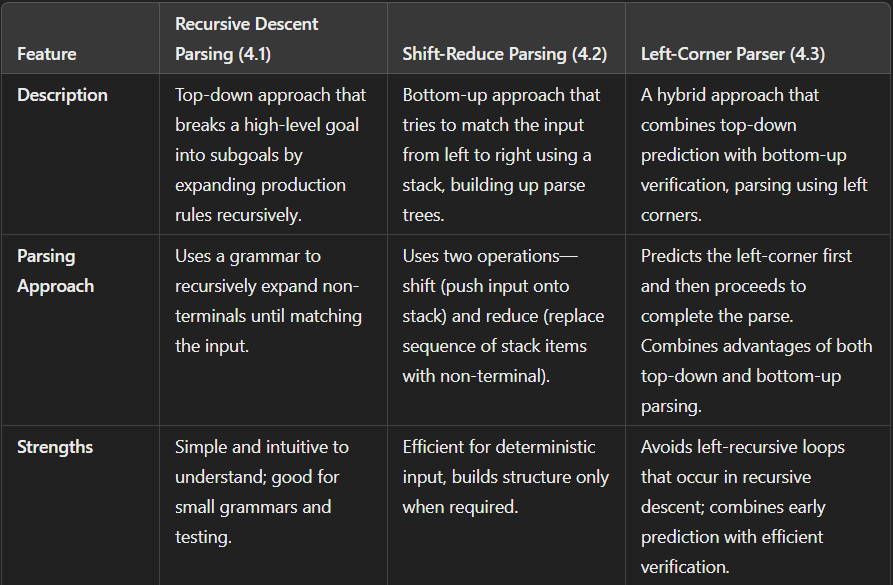

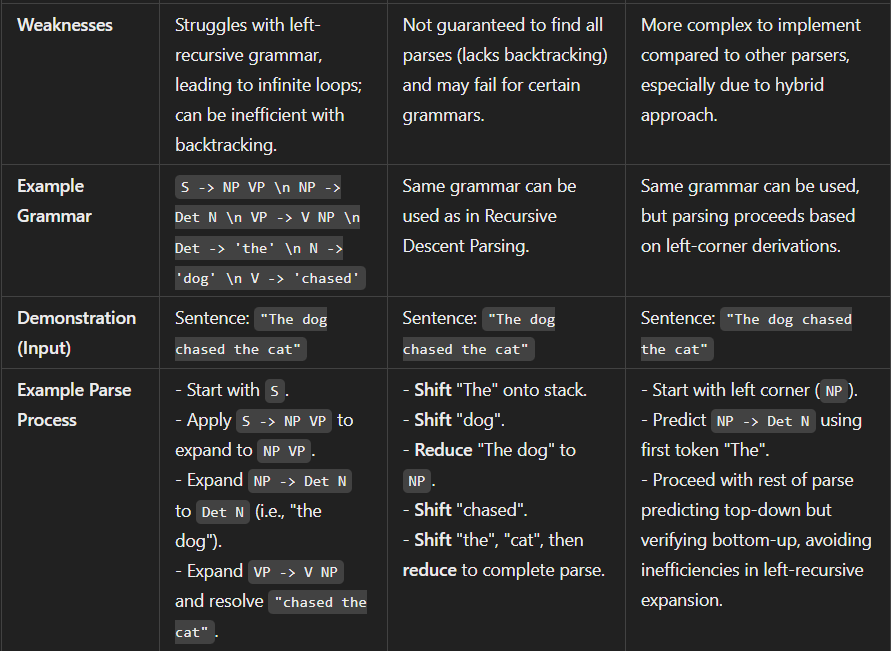

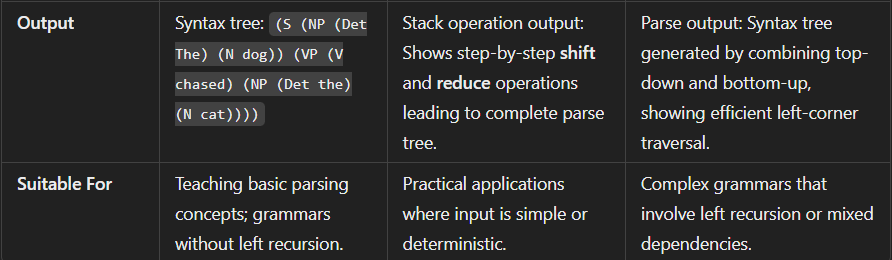

##**5. Dependencies and Dependency Grammar**



###**5.1 Valency and the Lexicon**



#### **Dependency Grammar (DG)**
  - Dependency Grammar is an approach that emphasizes the relationships between individual words in a sentence, rather than focusing on phrase structure.
  - In DG, the syntactic structure of a sentence is represented as a collection of binary relations between words, where each word is connected to its dependents.
  - **Example**: In the sentence "She gave him a book," DG captures the relationships: "gave" is the head word, and it connects to the subject ("she"), the indirect object ("him"), and the direct object ("a book").



#### **Parsing Using Dependency Grammar**
  - Dependency parsing aims to determine which words are the **heads** (central words) and which are **dependents** (modifying words) in a sentence.
  - This type of parsing helps in understanding sentence meaning by directly showing how words relate to one another.
  - **Code Demonstration**:


In [15]:
from nltk import DependencyGrammar, ProjectiveDependencyParser
dg = DependencyGrammar.fromstring("""
'gave' -> 'she' | 'him' | 'book'
'book' -> 'a'
""")
parser = ProjectiveDependencyParser(dg)
sent = 'she gave him a book'.split()
for tree in parser.parse(sent):
    print(tree)


(gave she him (book a))


In [17]:
for tree in parser.parse(sent):
  tree.pretty_print()

    gave     
  ___|____    
 |   |   book
 |   |    |   
she him   a  



  - **Example**:
    - In the sentence "The boy kicked the ball," "kicked" is the head, and "the boy" and "the ball" are dependents that provide more information about the action.



#### **Understanding Valency and Subcategorization**
  - **Valency**: The valency of a word, particularly a verb, refers to the number of arguments it requires.
    - For example, the verb "sleep" has a valency of one (it only requires a subject), while "give" has a valency of three (subject, direct object, and indirect object).
  - **Subcategorization**: Subcategorization specifies the types of arguments a verb can take.
    - **Example**: The verb "give" subcategorizes for a subject, an object, and an indirect object (e.g., "She gave him a book"). This helps determine the structure of the sentence during parsing.



### **5.2 Scaling Up**



#### **Challenges in Building Broad-Coverage Grammars**
  - **Complexity of Language**: Natural language is highly complex and diverse, making it challenging to create a grammar that covers all possible sentence constructions.
  - **Ambiguity**: Broad-coverage grammars often generate multiple parse trees for the same sentence, leading to ambiguity. Resolving which parse is correct can be very difficult.
  - **Inflexibility**: Hand-written grammars may not adapt well to new language phenomena, slang, or rapidly changing language use.



#### **Strategies for Developing Large-Scale Grammars**
  - **Modular Grammar Design**: Divide the grammar into smaller, manageable components that can be worked on independently and then combined. This approach makes development easier and helps manage complexity.
  - **Hybrid Approaches**: Use a combination of rule-based and statistical methods to handle ambiguity and enhance robustness.
    - **Rule-Based Methods**: Useful for ensuring grammatical correctness and precision.
    - **Statistical Techniques**: Use probability to prioritize the most likely parse among multiple options.
    - **Example**: A statistical model could learn from a large corpus of sentences that the phrase "the cat sat on the mat" is more common than other grammatically correct but unusual alternatives, thus prioritizing the most plausible structure.
  - **Data-Driven Grammar Expansion**: Utilize annotated corpora to expand grammar coverage and refine parsing accuracy.
    - Large corpora like the Penn Treebank provide real-world examples that can be used to enhance the grammar.
    - Automatically extracting rules from these corpora helps in building robust grammars capable of handling diverse sentence structures.
    